<h1 align="center"> Collecting data via API</h1>

<h2>Retrieving stock data with yfinance</h2>

In [ ]:
!pip install yfinance

     |████████████████████████████████| 6.3MB 23.5MB/s 
  Created wheel for yfinance: filename=yfinance-0.1.59-py2.py3-none-any.whl size=23442 sha256=076104a2b8e4003ee9a8aca787eb191eb53fe8cf0f7f1977303070f261188bdb
  Stored in directory: /root/.cache/pip/wheels/f8/2a/0f/4b5a86e1d52e451757eb6bc17fd899629f0925c777741b6d04
Successfully built yfinance
  Found existing installation: lxml 4.2.6
    Uninstalling lxml-4.2.6:
      Successfully uninstalled lxml-4.2.6


In [ ]:
import yfinance as yf
import pprint as pp

In [ ]:
#  access ticker data of Microsoft via Ticker module, "MSFT" 
msft = yf.Ticker("MSFT")

In [ ]:
# get stock informantion of Microsoft
msft_info = msft.info
pp.pprint(msft_info)

{'52WeekChange': 0.35193312,
 'SandP52WeekChange': 0.4444797,
 'address1': 'One Microsoft Way',
 'algorithm': None,
 'annualHoldingsTurnover': None,
 'annualReportExpenseRatio': None,
 'ask': 246.7,
 'askSize': 3200,
 'averageDailyVolume10Day': 26452400,
 'averageVolume': 28472500,
 'averageVolume10days': 26452400,
 'beta': 0.787165,
 'beta3Year': None,
 'bid': 246.7,
 'bidSize': 2900,
 'bookValue': 17.853,
 'category': None,
 'circulatingSupply': None,
 'city': 'Redmond',
 'companyOfficers': [],
 'country': 'United States',
 'currency': 'USD',
 'dateShortInterest': 1618444800,
 'dayHigh': 251.73,
 'dayLow': 247.12,
 'dividendRate': 2.24,
 'dividendYield': 0.0089,
 'earningsQuarterlyGrowth': 0.438,
 'enterpriseToEbitda': 24.579,
 'enterpriseToRevenue': 11.613,
 'enterpriseValue': 1857668251648,
 'exDividendDate': 1621382400,
 'exchange': 'NMS',
 'exchangeTimezoneName': 'America/New_York',
 'exchangeTimezoneShortName': 'EDT',
 'expireDate': None,
 'fiftyDayAverage': 249.88823,
 'fiftyTw

In [ ]:
three_month_data = msft.history(period="3mo")

In [ ]:
three_month_data

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2021-02-11,244.217519,244.586664,241.593558,243.928192,15751100,0.00,0
2021-02-12,243.369471,244.736333,242.172231,244.427048,16561100,0.00,0
2021-02-16,244.466945,245.564423,242.361793,243.139999,26728500,0.00,0
2021-02-17,241.320007,244.309998,240.940002,244.199997,21653500,0.56,0
2021-02-18,241.800003,243.929993,240.860001,243.789993,16925600,0.00,0
...,...,...,...,...,...,...,...
2021-05-04,250.970001,251.210007,245.759995,247.789993,32756100,0.00,0
2021-05-05,249.059998,249.500000,245.820007,246.470001,21901300,0.00,0
2021-05-06,246.449997,249.860001,244.690002,249.729996,26491100,0.00,0


In [ ]:
three_month_data.columns

Index(['Open', 'High', 'Low', 'Close', 'Volume', 'Dividends', 'Stock Splits'], dtype='object')

In [ ]:
!pip install plotly --upgrade

     |████████████████████████████████| 13.2MB 295kB/s 
  Found existing installation: plotly 4.4.1
    Uninstalling plotly-4.4.1:
      Successfully uninstalled plotly-4.4.1


In [ ]:
import plotly.express as px

In [ ]:
fig = px.line(three_month_data, x= three_month_data.index, y = ['Open', 'High', 'Low', 'Close'], title="Microsoft Corporation Stock Pirce",
              labels={"value":"Stock Price ($)", "variable":"Price Type"})
fig.show()

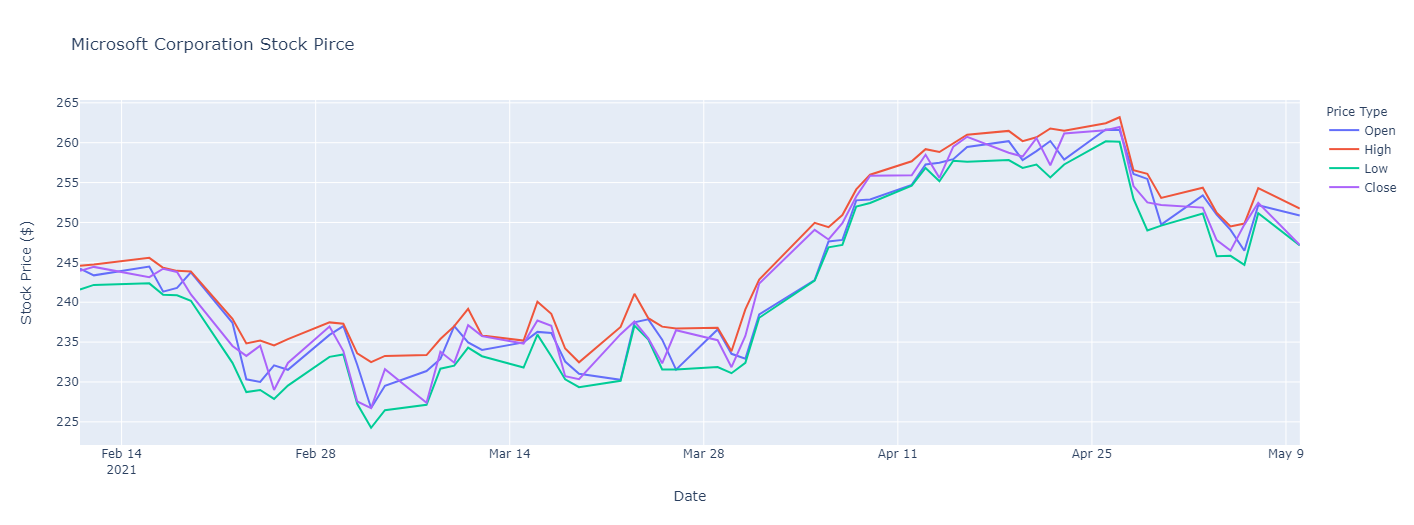

<h1> Collecting Twitter Data via API</h1>

In [ ]:
import tweepy as tp

In [ ]:
API_key = "key"
API_secret = "secret"
auth = tp.OAuthHandler(API_key, API_secret)
api = tp.API(auth)

In [ ]:
who= api.get_user('WHO')

In [ ]:
# print basic information of WHO twitter account
print("Accout name: ",who.name, 
      "\n Account Location: ", who.location, 
      "\n Number of Followers:",who.followers_count, 
      "\n Number of Following: ", who.friends_count, 
      "\n Link: ",who.url,
      "\n Bio: ", who.description)

Accout name:  World Health Organization (WHO) 
 Account Location:  Geneva, Switzerland 
 Number of Followers: 9340455 
 Number of Following:  1738 
 Link:  https://t.co/wVulKuROWG 
 Bio:  We are the #UnitedNations’ health agency - #HealthForAll.
▶️ Always check our latest tweets on #COVID19 for updated advice/information.


In [ ]:
# authentication() method can return the 20 most recent statuses posted;
# here we only return 5 recent posts as example.
who_timeline = api.user_timeline('WHO', count=5)

In [ ]:
for tweet in who_timeline:
  print(tweet.text)
  print('_' * 70)

LIVE with @DrTedros at the @YaleSPH conversation on ensuring equitable response to #COVID19 &amp; beyond https://t.co/ngWIE3qrf1
______________________________________________________________________
WHO is the guardian of global health: We aim to promote health, keep the world safe and serve the vulnerable.
Toget… https://t.co/5Gae9kRwTT
______________________________________________________________________
Live Q&amp;A on how to support midwives and nurses. Ask your questions! #AskWHO https://t.co/TdsVVzwKbT
______________________________________________________________________
Before the arrival of #COVID19 vaccines 💉, Trinidad &amp; Tobago 🇹🇹 used simulation exercises to prepare their health w… https://t.co/xSVop59iXr
______________________________________________________________________
RT @opsoms: Celebremos juntos el #DíaInternacionalDeEnfermería 👨🏾‍⚕️👩🏿‍⚕️

👉🏾 Súmate al seminario web sobre “La necesidad de invertir en en…
________________________________________________________

In [ ]:
# find the first 10 friends of this account
who_friends = who.friends(count=10)
for friend in who_friends:
   print(friend.name,":",friend.screen_name)

ACT-Accelerator : ACTAccelerator
Dr Hamid Jafari : Dr_HamidJafari
Malene Kamp Jensen : mkampjensen
Anil Soni : _AnilSoni
WHO North Macedonia : WHOMKD
Janet V. Diaz : diazjv
WHO Botswana : WHOBotswana
WHOMauritius : WHOMauritius
WHO Albania : WHOAlbania
Birdwatch : birdwatch


In [ ]:
# extracting social relationships
social_relationship = {}
# add the screen names of WT and its friends to social_relationship dict.
social_relationship[who.screen_name] = [i.screen_name for i in who_friends ]
# find the first 10 friends of WT's friends and add their screen name to dict
for friend in who_friends:
  friends_of_friend = friend.friends(count=10)
  social_relationship[friend.screen_name] = [i.screen_name for i in friends_of_friend ]

In [ ]:
social_relationship

{'ACTAccelerator': ['dagiulstein',
  'DrZweliMkhize',
  'CharlesMichel',
  'CanadaDev',
  'Stop_Pneumonia',
  'AmbassadorTai',
  'AtMIndex',
  'ONECampaign',
  'CDCgov',
  'SAfrPMUN_Geneva'],
 'Dr_HamidJafari': ['iBabarBaloch',
  'michel_zaffran',
  'SabrinaSiddiqui',
  'KuzmanovicA',
  'NayyarUjala',
  'UNICEF_EU',
  'Soghaier',
  'JohnsHopkinsSPH',
  'CDCDirector',
  'Laurie_Garrett'],
 'WHO': ['ACTAccelerator',
  'Dr_HamidJafari',
  'mkampjensen',
  '_AnilSoni',
  'WHOMKD',
  'diazjv',
  'WHOBotswana',
  'WHOMauritius',
  'WHOAlbania',
  'birdwatch'],
 'WHOAlbania': ['UN_News_Centre',
  'albania_unicef',
  'UNHCRAlbania',
  'UNDPAlbania',
  'unwomenalbania',
  'WHO_Europe_DE',
  'WHO_Europe_VPI',
  'gavi',
  'WHOEMRO',
  'WHOatEU'],
 'WHOBotswana': ['Madidimaloteb',
  'TheMonitorBW',
  'KentseMoakofhi',
  'AbdelGomina',
  'Go_Francistown',
  'FCdO',
  'GSegoea',
  'NAHPA2',
  'BusinesssBotsPR',
  'oms_benin'],
 'WHOMKD': ['AmbassadorEU',
  'UNICEFMK',
  'EU_Partnerships',
  'gnorm18

In [ ]:
# we use networkx and matplotlib to plot the social relationships in a network
import networkx as nx
import matplotlib.pyplot as plt

In [ ]:
# create an empty network
G = nx.Graph()
# add user and friends to the network. There is a connection between two users if they are friends.
for user, friends in social_relationship.items():
  for friend in friends:
    G.add_edge(user, friend)

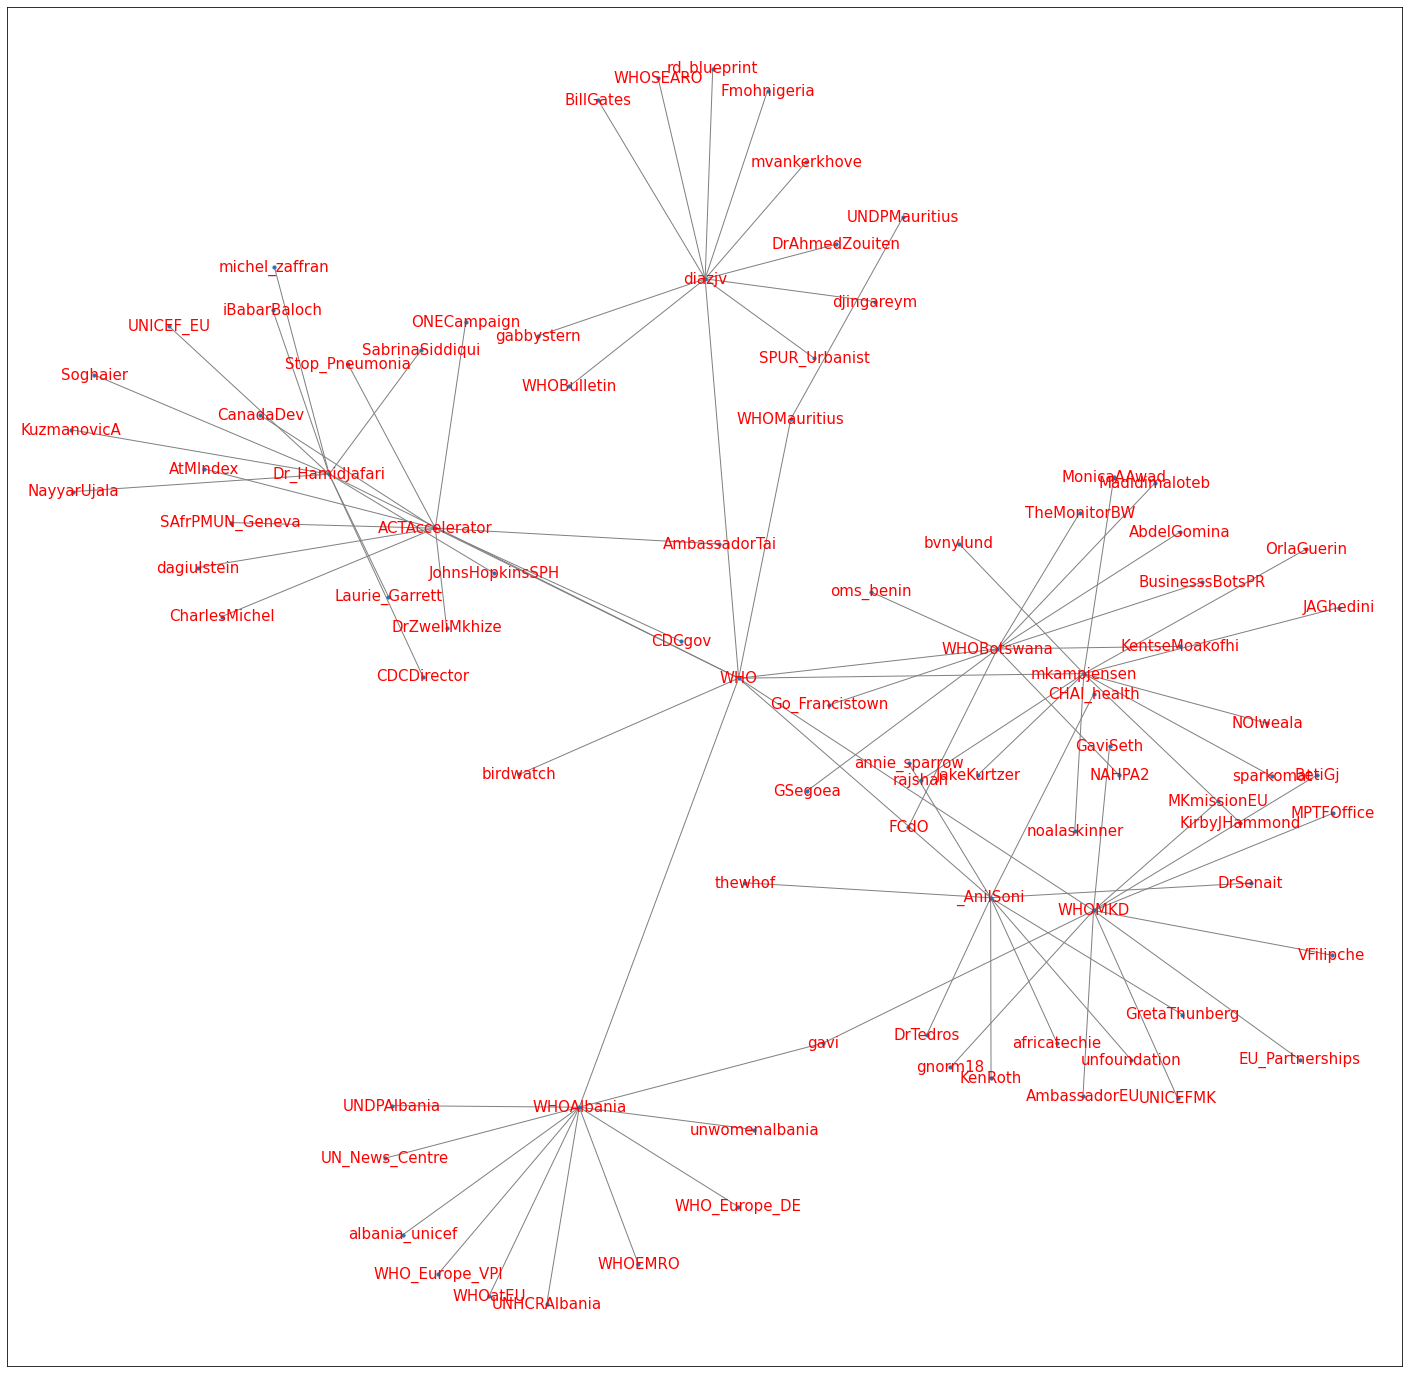

In [ ]:
# plot the social relationships
plt.figure(figsize=(25,25))
pos = nx.spring_layout(G,iterations=15)
# draw all nodes
nx.draw_networkx_nodes(G,pos, node_size = 10)

# Then, draw all edges
nx.draw_networkx_edges(G, pos, edge_color = 'gray', width=1)
nx.draw_networkx_labels(G, pos, font_color='red',font_size=15)
plt.show()